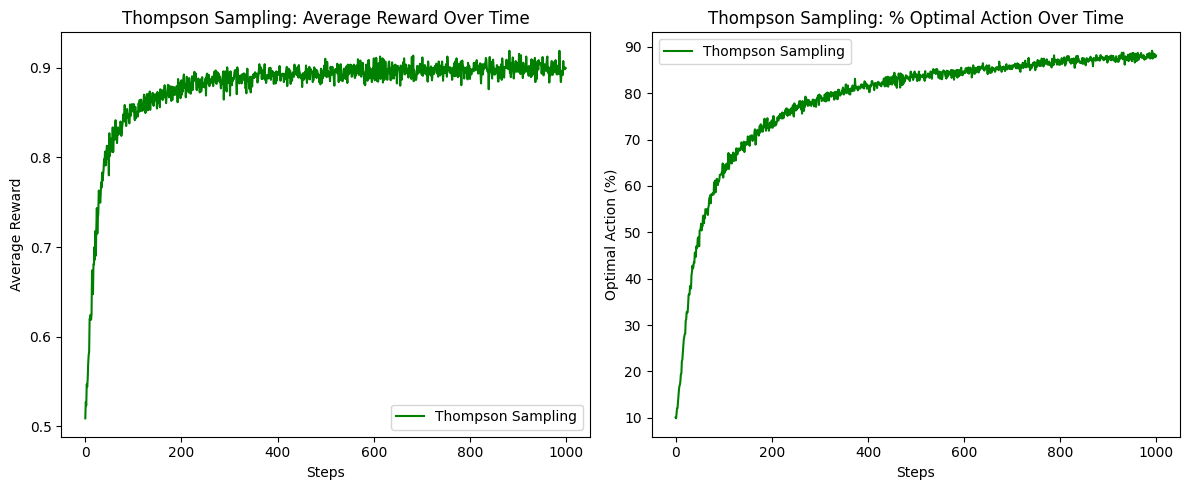

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def thompson_sampling(k=10, steps=1000, runs=2000):
    rewards = np.zeros((runs, steps))
    optimal_action_counts = np.zeros((runs, steps))

    for run in range(runs):
        q_true = np.random.rand(k)  # Bernoulli bandit, true probabilities between 0 and 1
        alpha = np.ones(k)  # success count
        beta_param = np.ones(k)  # failure count
        optimal_action = np.argmax(q_true)

        for t in range(steps):
            theta = np.random.beta(alpha, beta_param)
            action = np.argmax(theta)
            reward = np.random.rand() < q_true[action]

            alpha[action] += reward
            beta_param[action] += 1 - reward

            rewards[run, t] = reward
            if action == optimal_action:
                optimal_action_counts[run, t] = 1

    avg_rewards = rewards.mean(axis=0)
    optimal_action_perc = optimal_action_counts.mean(axis=0) * 100

    return avg_rewards, optimal_action_perc

# 執行並繪圖
avg_rewards, optimal_action_perc = thompson_sampling()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(avg_rewards, label="Thompson Sampling", color='green')
plt.title("Thompson Sampling: Average Reward Over Time")
plt.xlabel("Steps")
plt.ylabel("Average Reward")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(optimal_action_perc, label="Thompson Sampling", color='green')
plt.title("Thompson Sampling: % Optimal Action Over Time")
plt.xlabel("Steps")
plt.ylabel("Optimal Action (%)")
plt.legend()

plt.tight_layout()
plt.show()